In [1]:
from MTSP_DS_MILP_Solver import MTSP_DS_MILP_Solver

from core.Location import rand_location
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 8
Dn = 2
Kn = 2

n_configuration = 3
n_trial = 3
num_of_ds = [0,1,2]

In [3]:
def randomLocations(num_of_locations):
    locs = []
    for _ in range(num_of_locations):
        locs.append(rand_location())
    return locs

customers:  [(55,80), (67,146), (113,127), (132,116), (37,111), (146,41), (22,47), (61,11)]
ds:  []
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-05


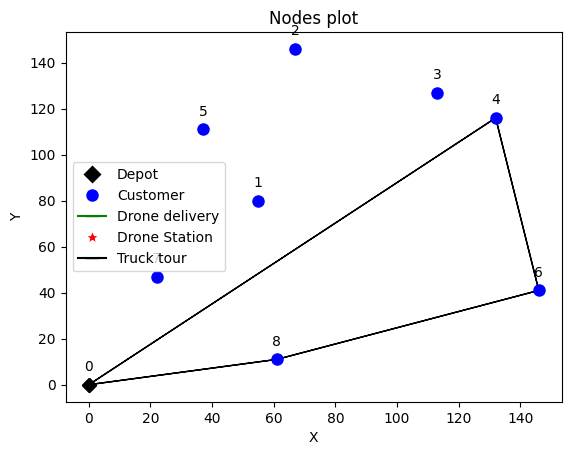

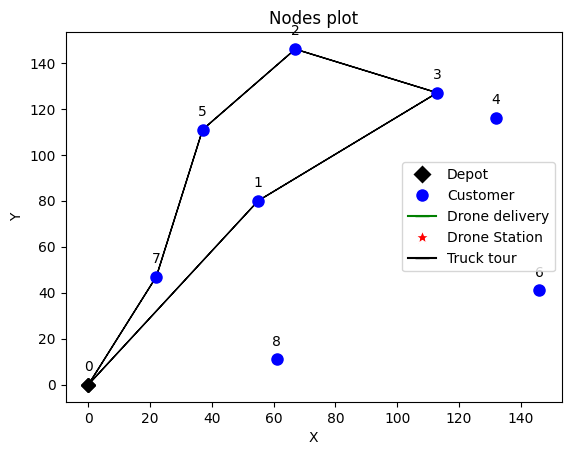

ds:  []


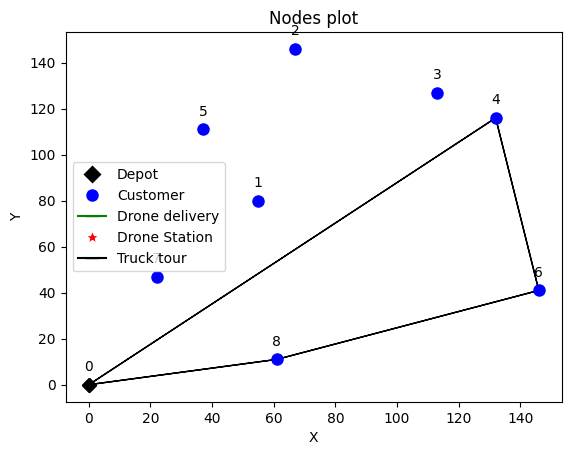

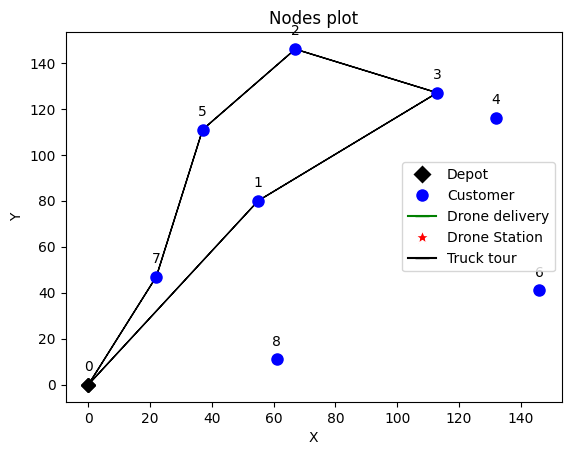

ds:  []


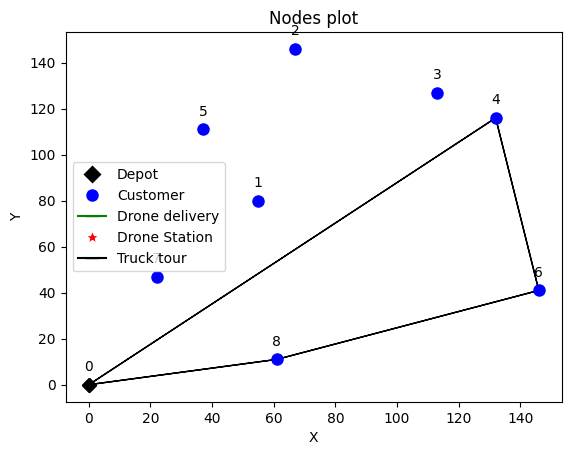

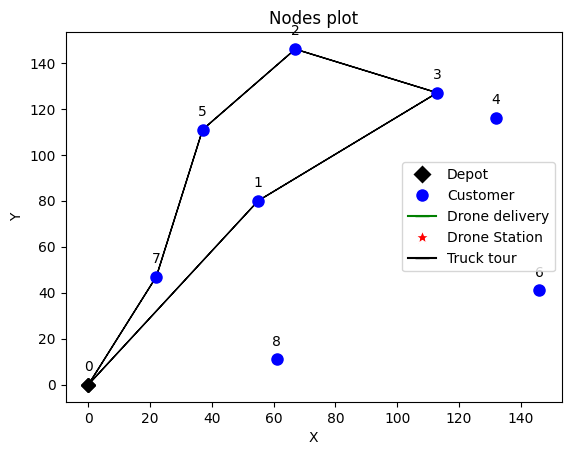

ds:  [(116,27)]


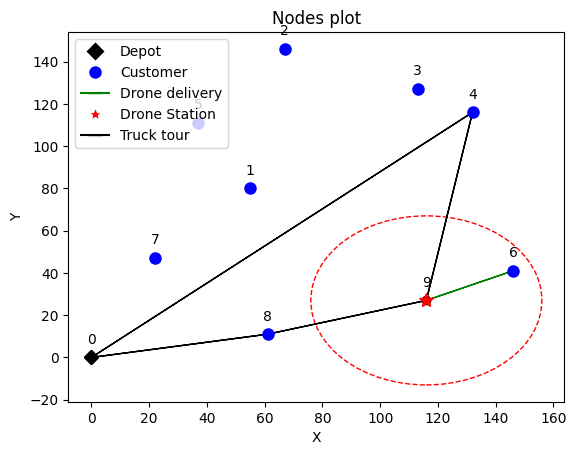

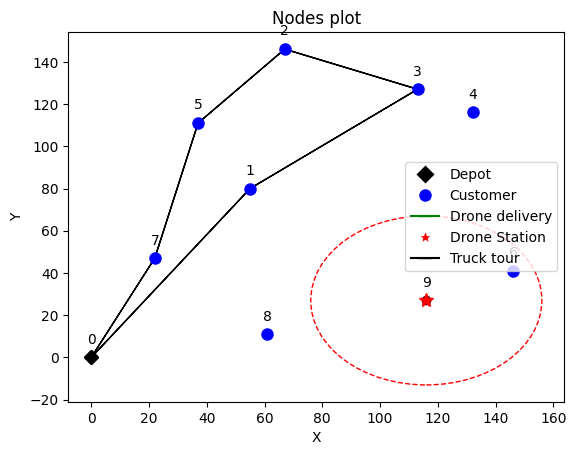

ds:  [(139,113)]


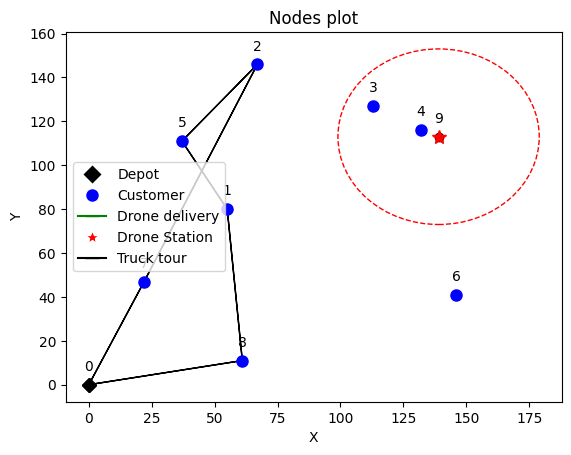

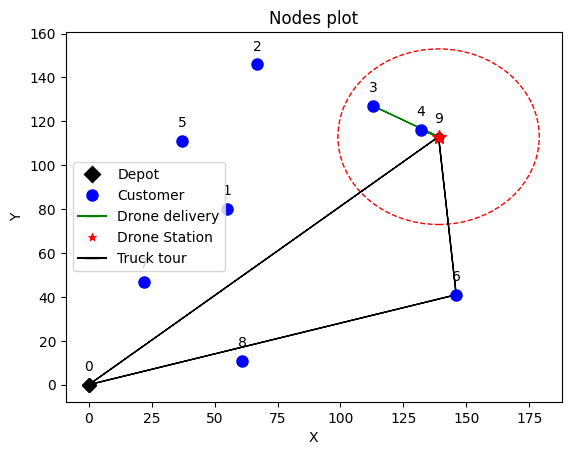

ds:  [(127,49)]


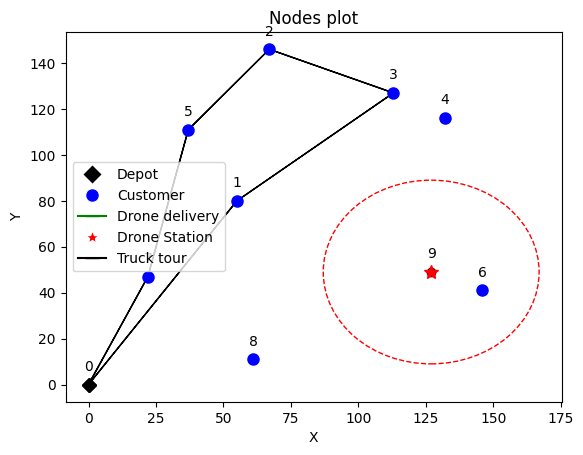

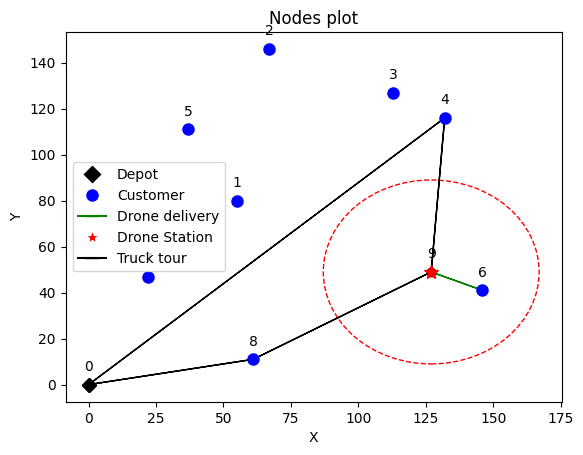

ds:  [(85,124), (72,142)]


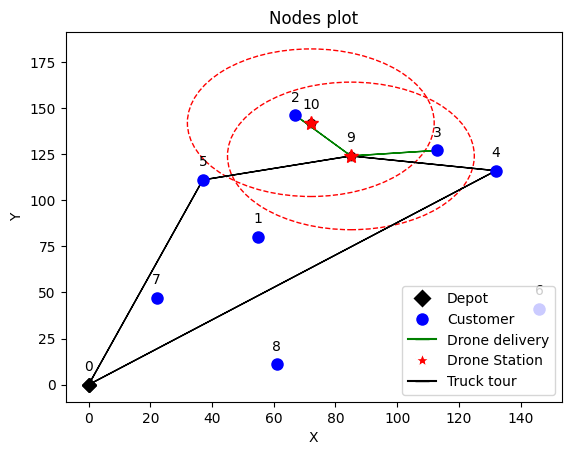

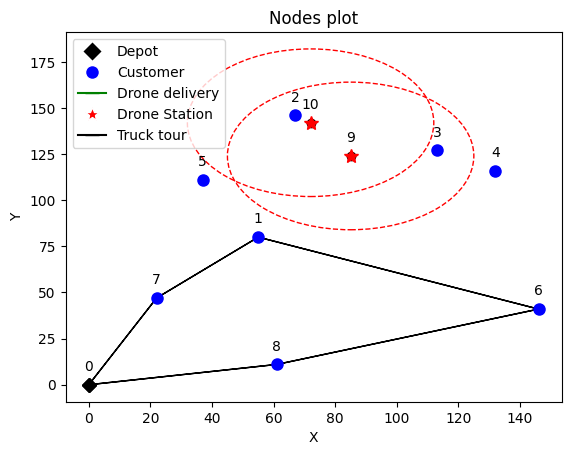

ds:  [(94,81), (24,75)]


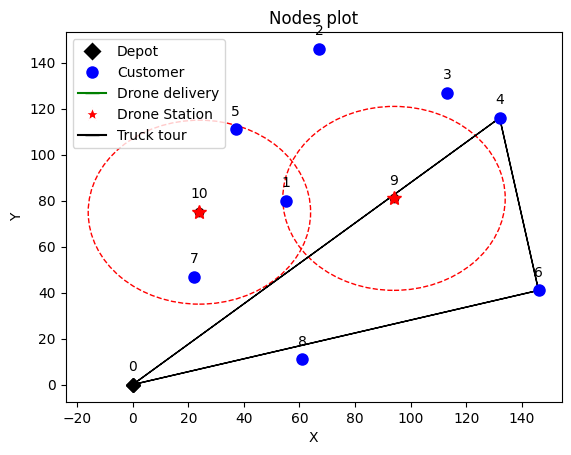

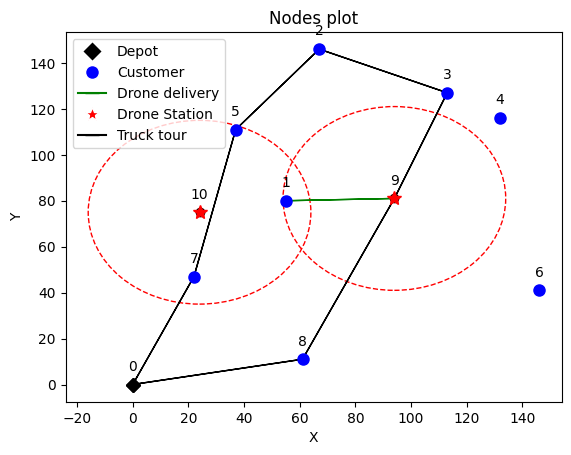

ds:  [(145,60), (1,42)]


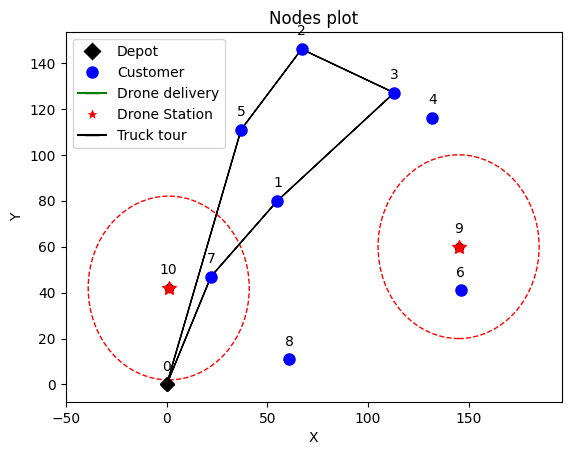

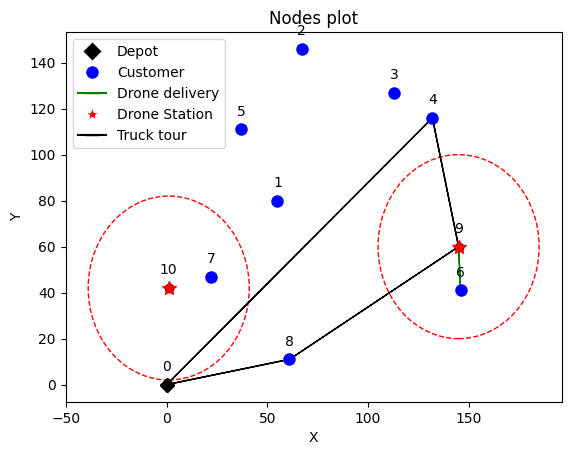

[404.14519008860697, 391.2574065231748, 395.4179719194439]
customers:  [(98,18), (94,68), (135,90), (68,50), (82,117), (146,112), (53,106), (68,141)]
ds:  []


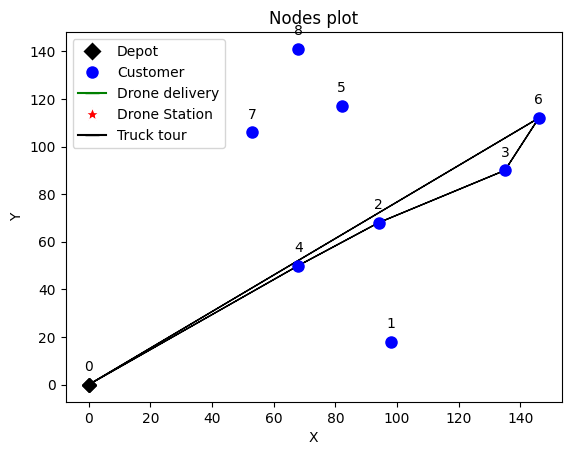

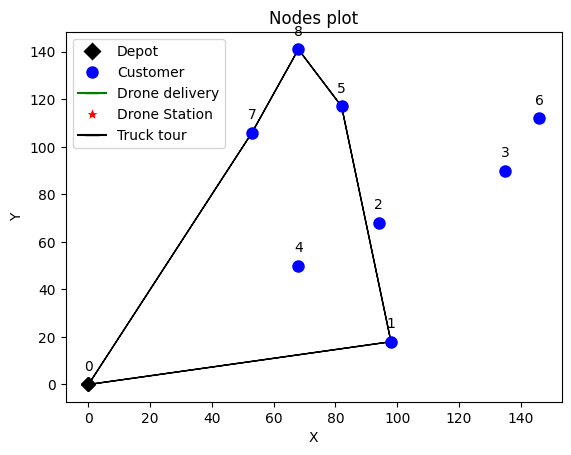

ds:  []


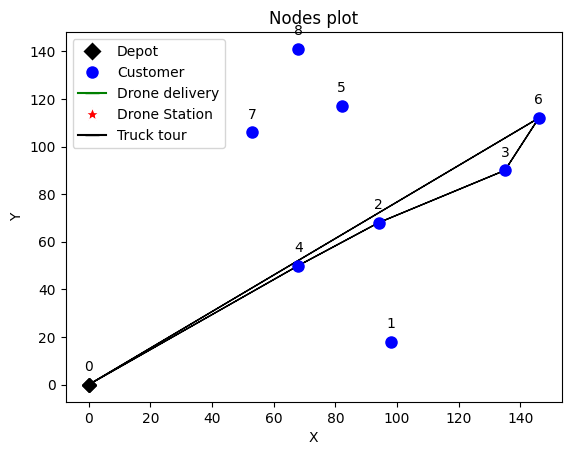

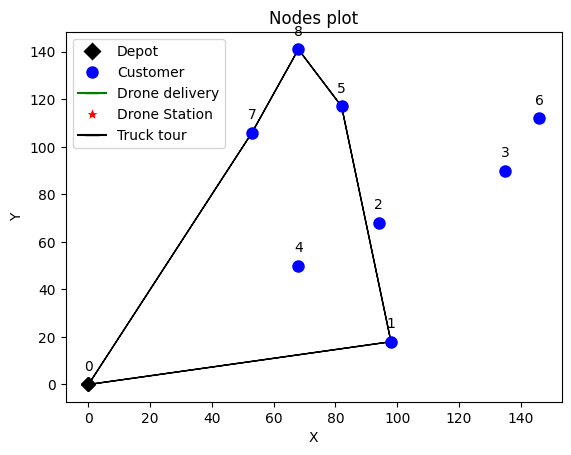

ds:  []


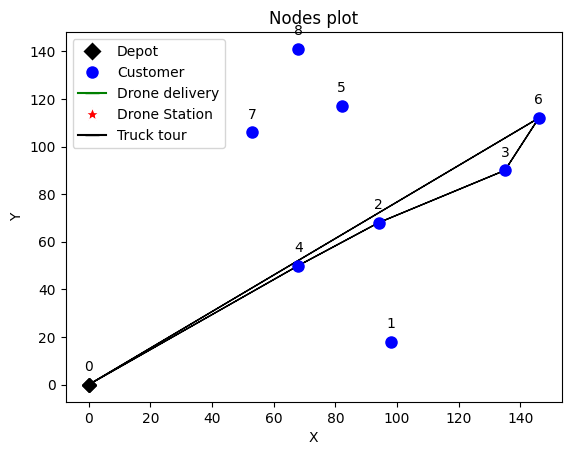

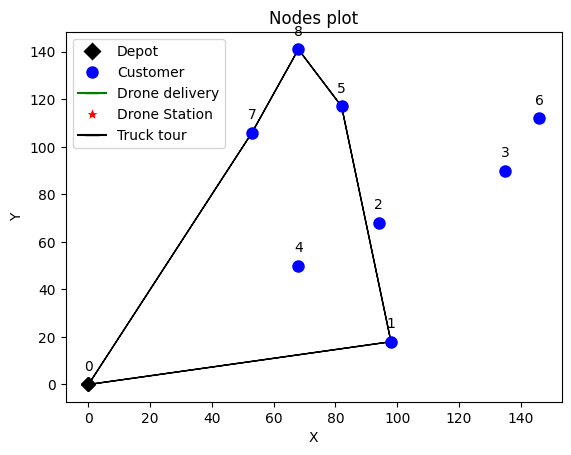

ds:  [(79,92)]


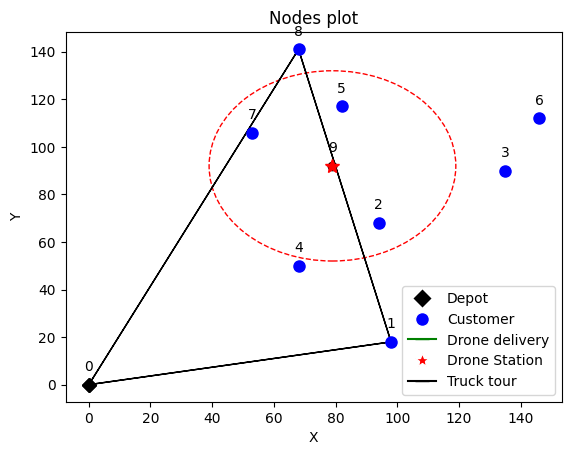

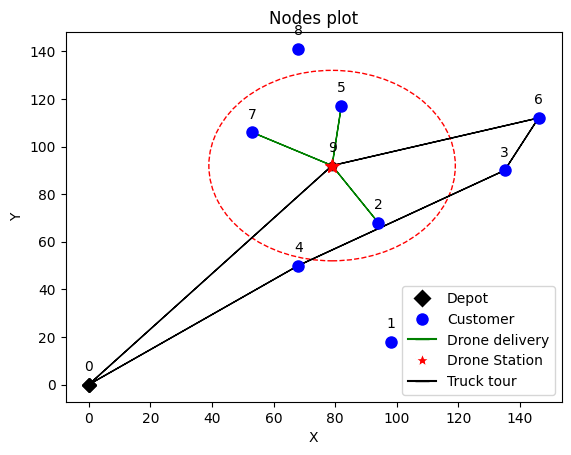

ds:  [(141,29)]


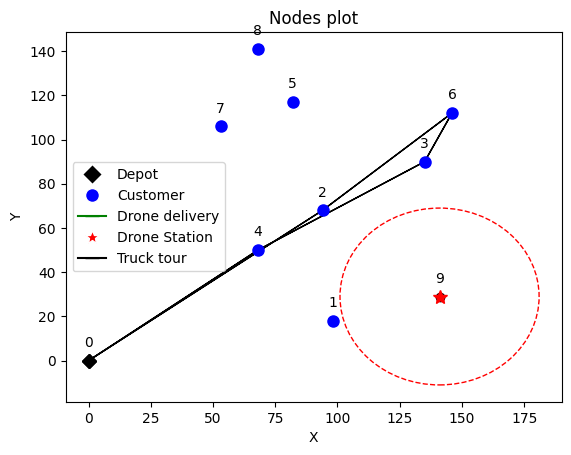

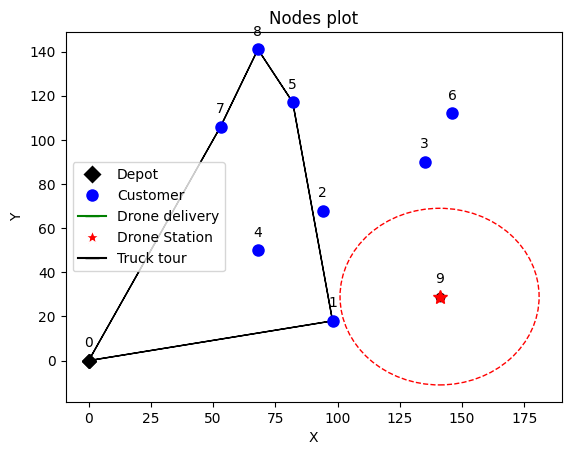

ds:  [(47,24)]


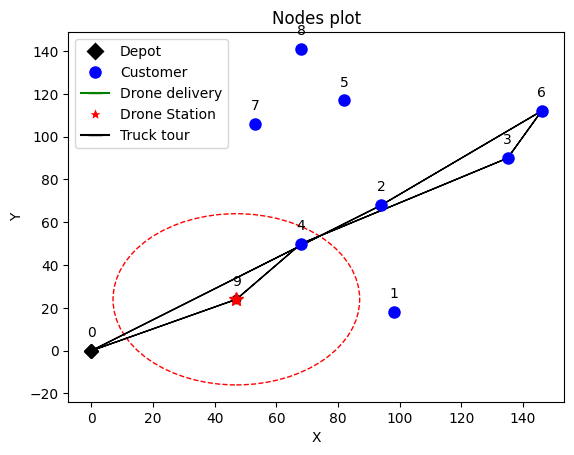

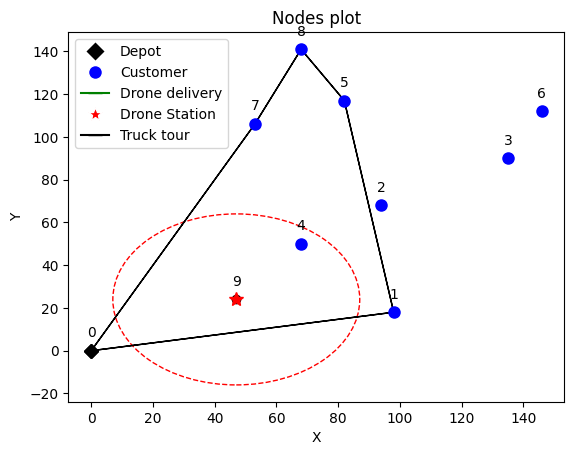

ds:  [(136,88), (27,76)]


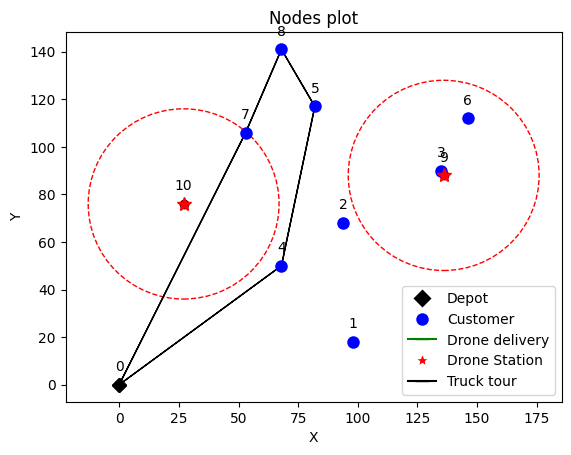

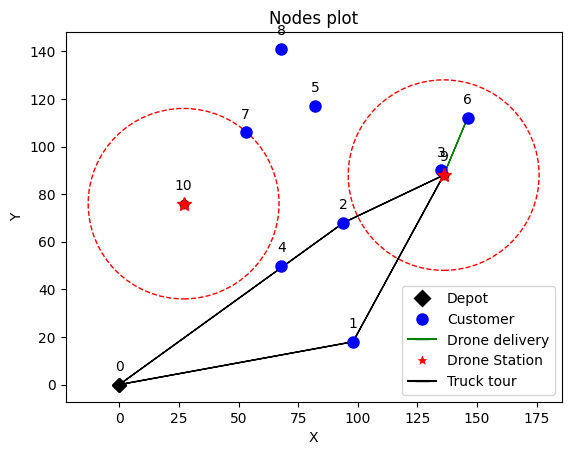

ds:  [(42,85), (22,8)]


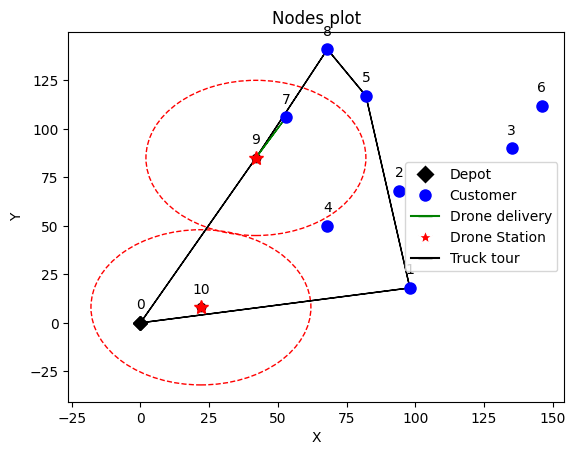

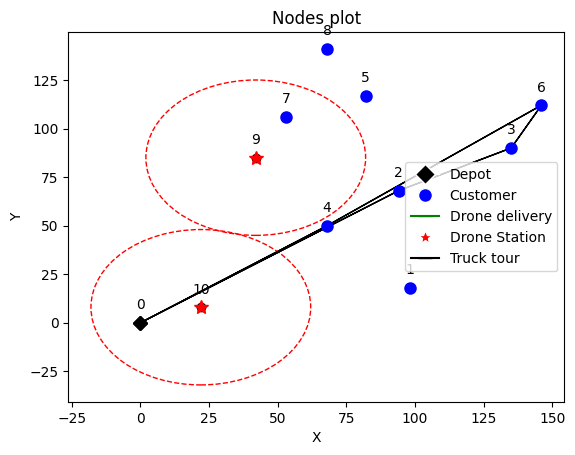

ds:  [(14,138), (106,146)]


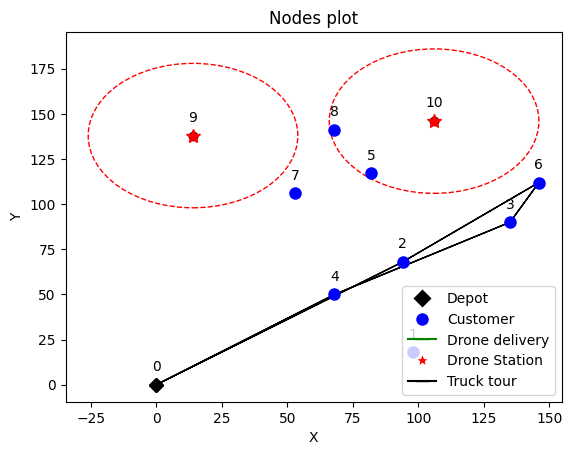

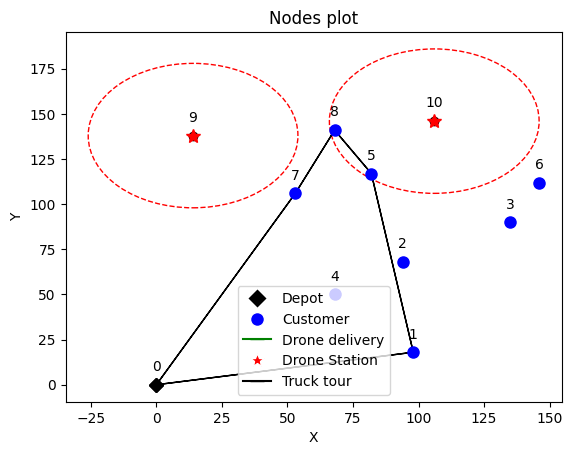

[384.29930100070646, 383.7947894194724, 370.12816699191745]
customers:  [(84,122), (108,146), (145,146), (146,120), (99,123), (53,3), (23,80), (20,98)]
ds:  []


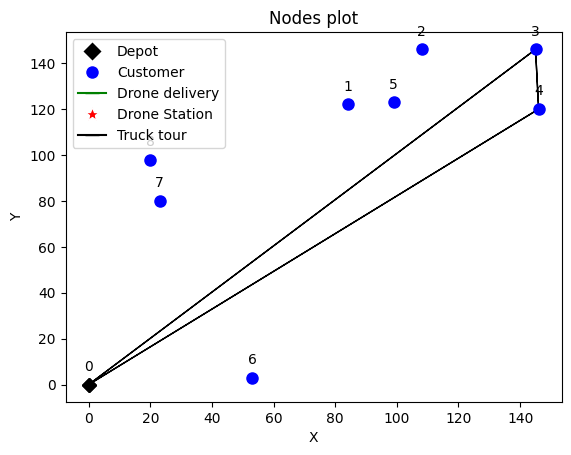

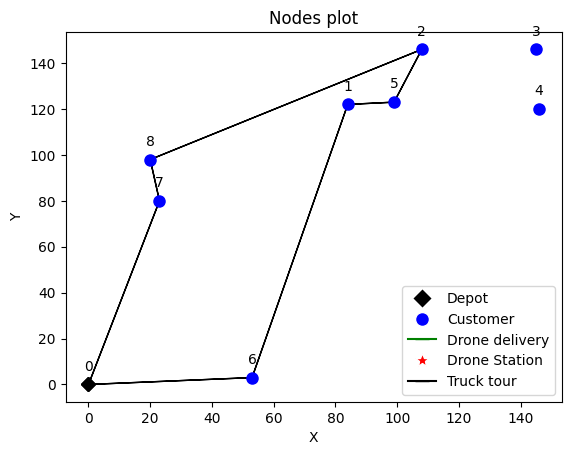

ds:  []


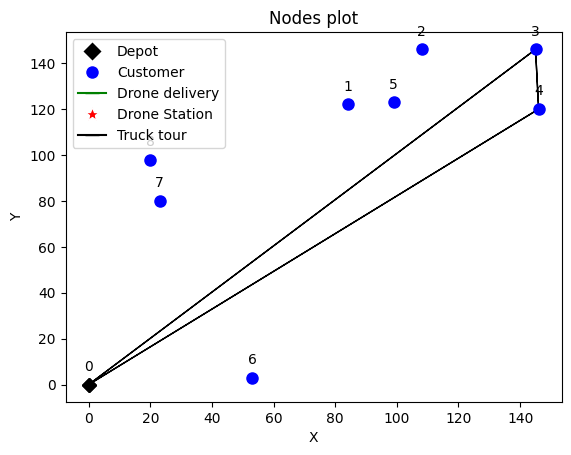

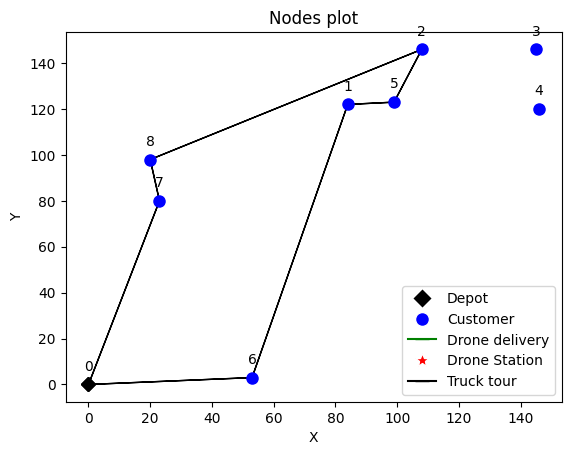

ds:  []


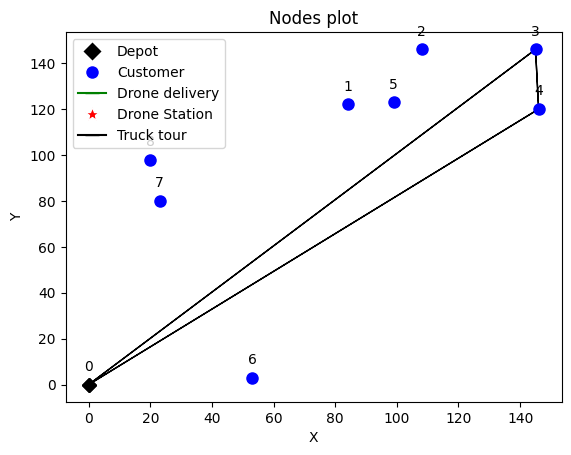

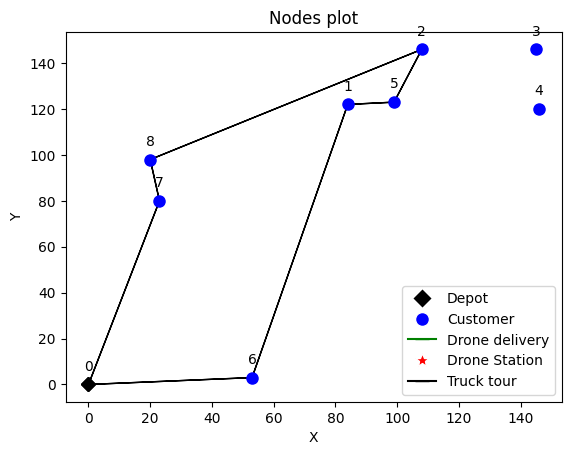

ds:  [(93,132)]


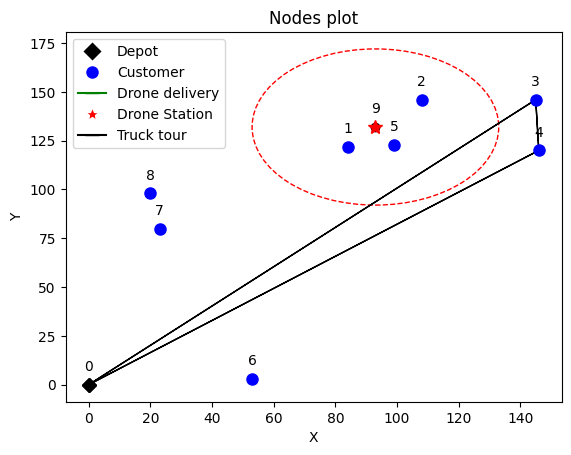

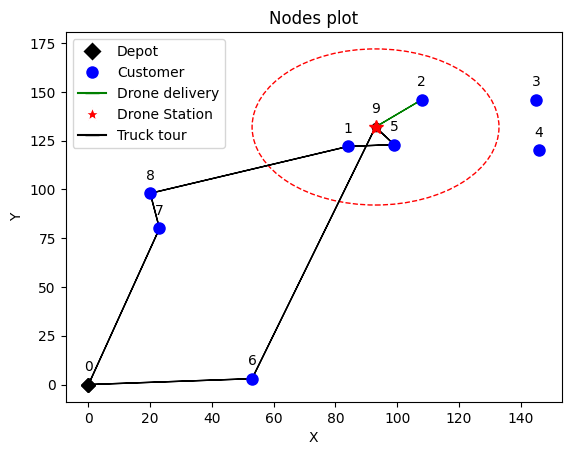

ds:  [(18,71)]


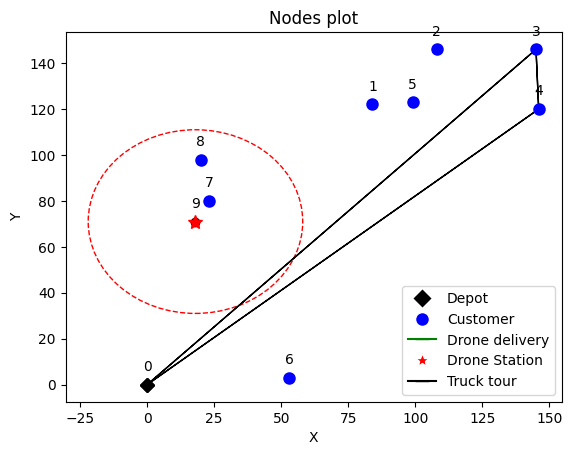

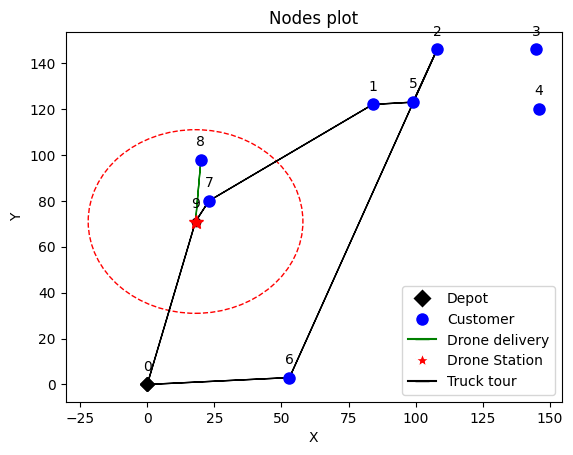

ds:  [(136,145)]


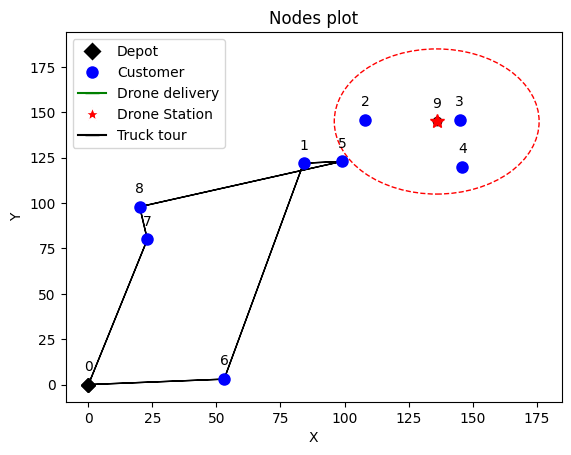

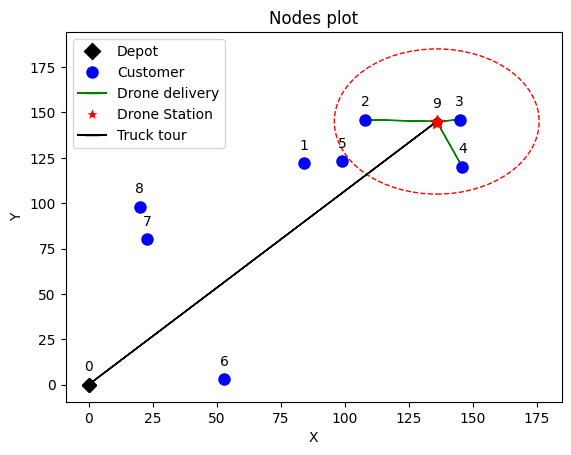

ds:  [(1,135), (102,81)]


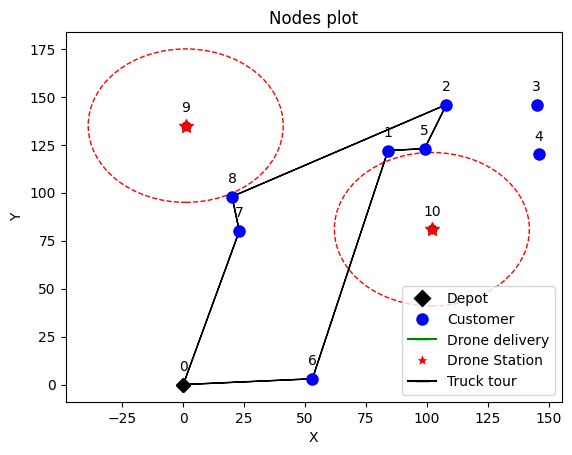

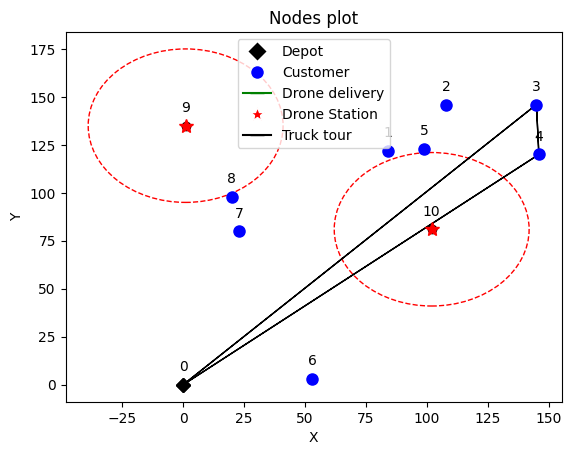

ds:  [(7,92), (128,106)]


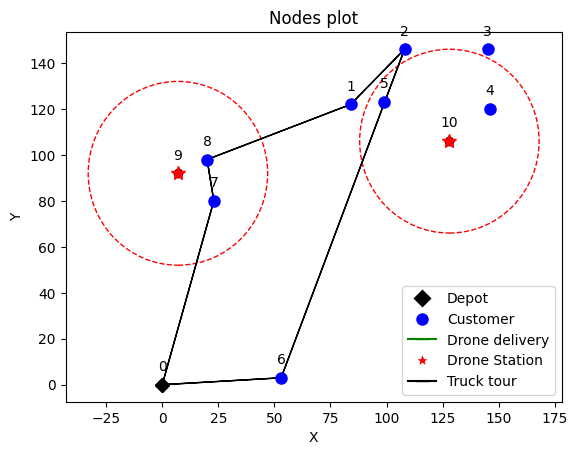

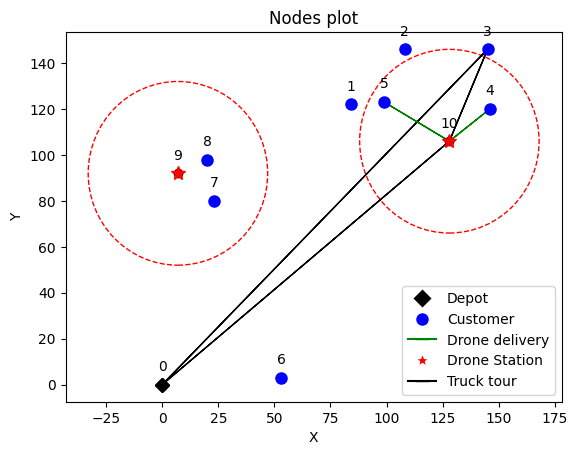

ds:  [(19,102), (14,98)]


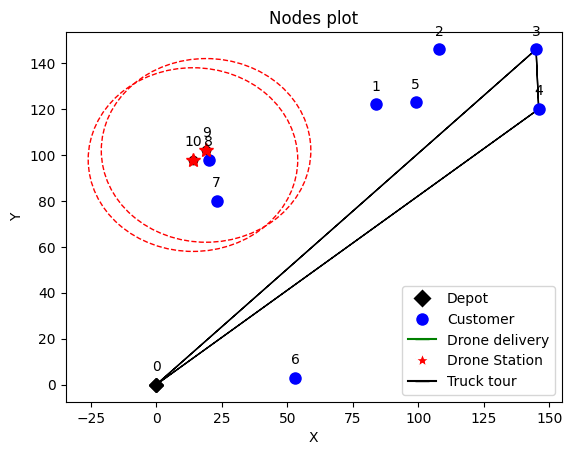

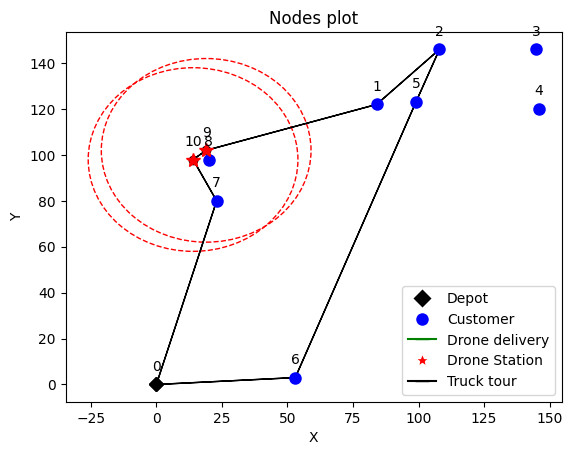

[420.7752839681832, 413.04945155017595, 418.99171437556925]
[[404.14519008860697, 391.2574065231748, 395.4179719194439], [384.29930100070646, 383.7947894194724, 370.12816699191745], [420.7752839681832, 413.04945155017595, 418.99171437556925]]


In [4]:
milp_fitness_average = []
for i in range(n_configuration):
    milp_fitness = []
    customer_location = randomLocations(n)
    print("customers: ", customer_location)
    for ds_number in num_of_ds:
        milp_solutions = []
        for _ in range(n_trial):
            while True:  
                ds_setup = randomLocations(ds_number)
                print("ds: ", ds_setup)
                setup = customer_location + ds_setup
                try:
                    milp_solver = MTSP_DS_MILP_Solver(n, ds_number, Kn = 2, eps= 80, custom_locations=setup)
                    milp_solver.solve()
                    milp_solutions.append(milp_solver.getSolution())
                    milp_solver.plot_tours()
                    break 
                except (Exception, TimeoutError) as e:
                    print(f"Errore durante l'esecuzione: {e}. Ritentando con un nuovo setup.")
                    continue
        milp_fitness.append(np.mean(milp_solutions))
        
    print(milp_fitness)
    milp_fitness_average.append(milp_fitness)
print(milp_fitness_average)

In [5]:
def get_improving_percentage(value, baseline):
    return (baseline - value) / baseline * 100

In [6]:
fitness_percentages = []
for i in range(n_configuration):
    improving_percentage = []
    for j in range(len(milp_fitness_average[i])):
        improving_percentage.append(get_improving_percentage(milp_fitness_average[i][j], milp_fitness_average[i][0]))
    fitness_percentages.append(improving_percentage)

transposed = zip(*fitness_percentages)
average_fitness_improvement_percentage = [sum(group) / len(group) for group in transposed]
print("Average fitness improvement vs Baseline: \n", average_fitness_improvement_percentage) 

Average fitness improvement vs Baseline: 
 [0.0, 1.7187583139167424, 2.0902762534683066]


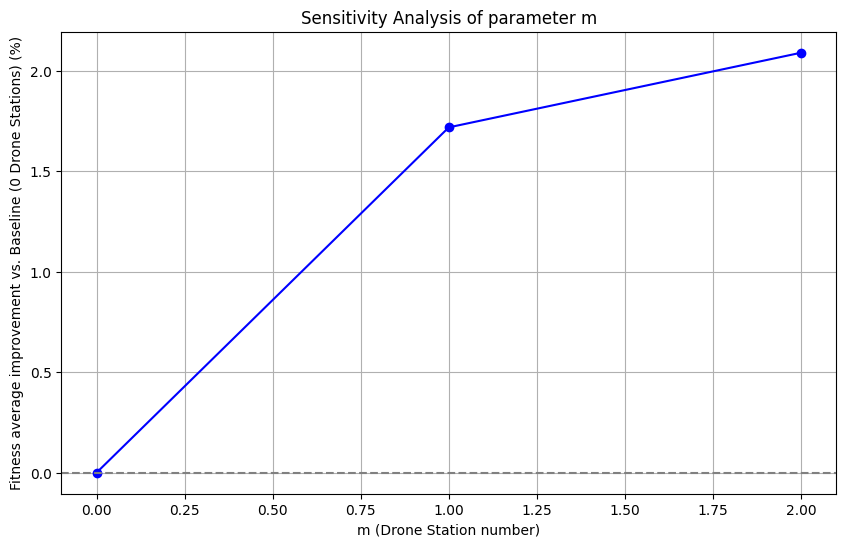

In [7]:
def plot_sensitivity_analysis(values):
    plt.figure(figsize=(10, 6))
    plt.plot(values, marker='o', linestyle='-', color='b')
    plt.axhline(0, color='gray', linestyle='--')

    plt.xlabel('m (Drone Station number)')
    plt.ylabel('Fitness average improvement vs. Baseline (0 Drone Stations) (%)')
    plt.title('Sensitivity Analysis of parameter m')
    plt.grid(True)
    plt.show()

plot_sensitivity_analysis(average_fitness_improvement_percentage)